# lab2

In [1]:
from jupyter_dash import JupyterDash

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import sympy as sm
import numpy as np
import pandas as pd
import plotly.graph_objects as go


In [2]:
e=sm.symbols("e")
v=sm.symbols("v")
v_t=2*sm.atan(sm.sqrt((1- e)/(1 + e))*sm.tan(v/2))-e*sm.sqrt(1-e**2)*sm.sin(v)/(1+e*sm.cos(v))
V=np.linspace(0.1, 2 * np.pi, 100)
vt=sm.lambdify([v,e],v_t)
def time(v,e):
    t=vt(v,e)
    if t < 0:
        return t + 2* np.pi
    return t

v_t

-e*sqrt(1 - e**2)*sin(v)/(e*cos(v) + 1) + 2*atan(sqrt((1 - e)/(e + 1))*tan(v/2))

In [3]:
E=sm.symbols("E")
e_t=E-e*sm.sin(E)
et=sm.lambdify([E,e],e_t)
e_t


E - e*sin(E)

In [4]:
app = JupyterDash('V_t')
app.layout = html.Div([
    dcc.Graph(id='graph'),
    html.Div(
        [html.P("Змінити значення екстренциситету e"),
        dcc.Slider(0, 0.999,id="e",value=0.)],
        style={"width":"35%","float":"left"}
    )
    
])
@app.callback(
    Output('graph', 'figure'),
    [Input("e", "value")]
)
def update_figure(e):
    fig=go.Figure()
    fig.add_trace(go.Scatter(
    x=[time(v,e) for v in V],
    y=V,
    name="v(t*)"
    ))
    fig.add_trace(go.Scatter(
    x=[et(v,e) for v in V],
    y=V,
    name="e(t*)"
    ))
    fig.update_layout(
        legend_title_text='e='+str(e),
        showlegend=True,
         xaxis=dict(
            tickmode = 'array',
            tickvals = np.linspace(0, 2 * np.pi, 5),
            ticktext = ['0', 'π/2', 'π', '3π/2', '2π'],
        ),
        yaxis=dict(
            tickmode = 'array',
            tickvals = np.linspace(0, 2 * np.pi, 5),
            ticktext = ['0', 'π/2', 'π', '3π/2', '2π']
            ),
        title="Залежність істинної аномалії v та рівняня Кеплера для ексцентричної аномалії від часу t*",
        xaxis_title="t*",
        yaxis_title="F(t*)",
        
)   
    return fig
app.run_server(mode="inline",port=8080)

Dash is running on http://127.0.0.1:8080/



# Lab1

In [96]:
t=sm.symbols("t")

omega=0.2300
e=0.67114
a2=-10.7111
a4=5.15825
a6=-4.42644
xi_e=3.69793
xi=sm.symbols('xi')
xi0=sm.symbols('xi0')
omeg=sm.symbols('omega')
xi

xi

# поверхня зорі

In [119]:
def xi_0(t):
    return xi_e*((1+t**2)*((e**2)/(1-e**2)))**-0.5
xi_0(1)

2.8883013816137564

# функції бесселя

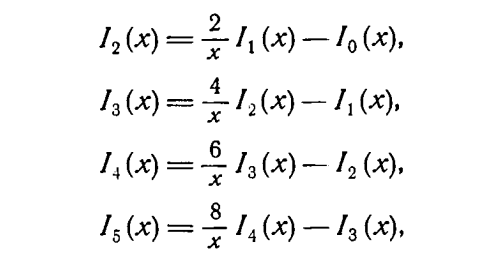

In [153]:
j0=sm.sin(xi)/xi
j0

sin(xi)/xi

In [154]:
j1=(sm.sin(xi)/xi)-(sm.cos(xi)/xi)
j1

sin(xi)/xi - cos(xi)/xi

In [155]:
j2=((3/xi**2)-1)*(sm.sin(xi)/xi)-(3*sm.cos(xi)/xi**2)
j2

(-1 + 3/xi**2)*sin(xi)/xi - 3*cos(xi)/xi**2

In [156]:
j3=(4/xi)*(j2-j1)
j3

4*((-1 + 3/xi**2)*sin(xi)/xi - sin(xi)/xi + cos(xi)/xi - 3*cos(xi)/xi**2)/xi

In [157]:
j4=(6/xi)*(j3-j2)
j4

6*(-(-1 + 3/xi**2)*sin(xi)/xi + 4*((-1 + 3/xi**2)*sin(xi)/xi - sin(xi)/xi + cos(xi)/xi - 3*cos(xi)/xi**2)/xi + 3*cos(xi)/xi**2)/xi

# поліном Лежандра

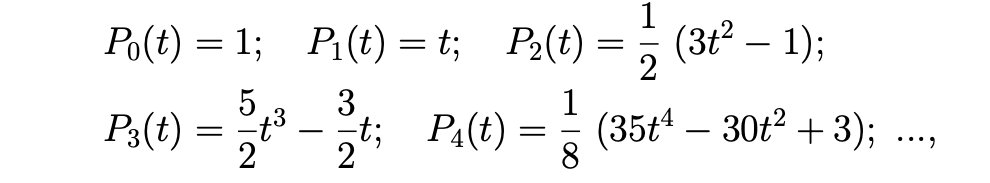

In [158]:
p2=1/2*(3*t**2-1)
p2

1.5*t**2 - 0.5

In [159]:
p4=1/8*(35*t**4-30*t**2+3)
p4

4.375*t**4 - 3.75*t**2 + 0.375

In [160]:
p_2=sm.lambdify(t,p2)
p_2(1)

1.0

# безрозмірні моменти інерції

In [173]:
one=sm.integrate((p2),(t,-1,1))
one

0

In [174]:
y2=j0+omega**2*(1-j0+a2*p2*j2)
y2

0.0529*(5.35555 - 16.06665*t**2)*((-1 + 3/xi**2)*sin(xi)/xi - 3*cos(xi)/xi**2) + 0.0529 + 0.9471*sin(xi)/xi

# J2

In [175]:
two=sm.integrate((xi**4*y2),(xi,0,xi_0(1)))
two

15.6307329521554 - 8.3562720251257*t**2

In [176]:
three=sm.integrate((xi**2*y2),(xi,0,xi_0(1)))
three

3.799171929226 - 1.46619859208561*t**2

In [177]:
four=sm.integrate(tree,(t,-1,1))
four

6.62087813039492

In [178]:
five=sm.integrate((p2*two),(t,-1,1))
five

-2.22833920670019

In [179]:
J2=(xi_e**-2)*five/four
J2

-0.0246120810040173

# J4

In [152]:
y4=j0+omega**2*(1-j0+(a2*p2*j2)+(a4*p4*j4))
y4

0.286053135581272*t**2 - 0.0424510451937574 + 0.3174*(0.336562486548484 + 4*(-0.336562486548484 - sin(xi)/xi + cos(xi)/xi)/xi)*(22.56734375*t**4 - 19.3434375*t**2 + 1.93434375)/xi + 0.9471*sin(xi)/xi

In [166]:
one=sm.integrate((p4),(t,-1,1))
one

0

In [167]:
two=sm.integrate((xi**6*y4),(xi,0,xi_0(1)))
two

-785.925533914885*t**4 + 742.175013380435*t**2 - 25.0219845558973

In [168]:
three=sm.integrate((xi**2*y4),(xi,0,xi_0(1)))
three

-66.0565248898719*t**4 + 58.9173650498202*t**2 + oo*sign(35*t**4 - 30*t**2 + 3) - 3.11737764010158

In [169]:
four=sm.integrate(tree,(t,-1,1))
four

6.62087813039492

In [170]:
five=sm.integrate((p4*two),(t,-1,1))
five

-39.9200271194862

In [172]:
J4=(xi_e**-4)*five/four
J4

-0.0322433746840580

In [134]:
def trapezian(left, right, n, function):
    h = (right - left) / (n)

    return (function(left) + function(right) +
        sum(function(left + step * h) for step in range(1, n))) * h